<a href="https://colab.research.google.com/github/linmariaso/colab-codes/blob/main/Seminar3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation matrix Diabetes data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
diab = 'diabetes.csv'
data = pd.read_csv(diab)

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


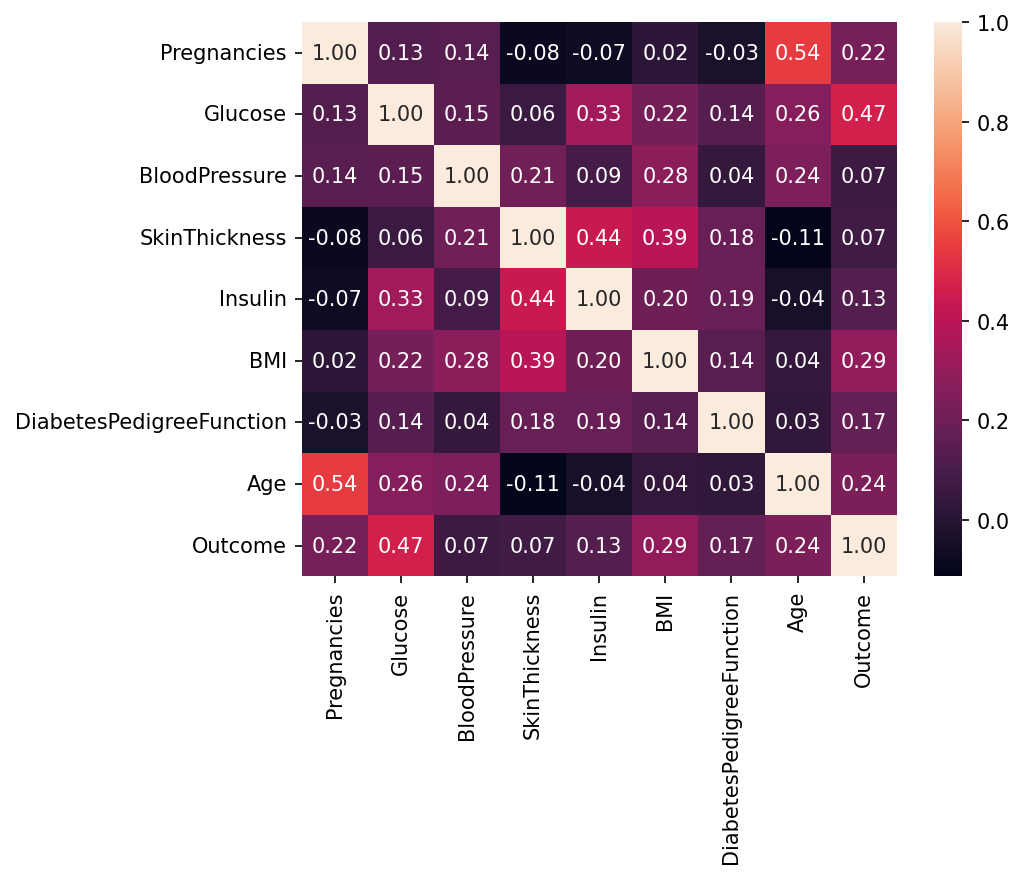

In [ ]:
#correlation
df = pd.DataFrame(data)
corr = df.corr()

plt.figure(dpi=150)
sns.heatmap(corr, annot=True, fmt= '.2f')
plt.show()

Imbalanced data

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
np.random.seed(37)
X, y = make_classification(**{
    'n_samples': 5000,
    'n_features': 5,
    'n_classes': 2,
    'random_state': 37})

columns = [f'x{i}' for i in range(X.shape[1])] + ['y']
df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]), columns=columns)

print(df.shape)

(5000, 6)


In [ ]:
df.head()

,x0,x1,x2,x3,x4,y
0,-0.729402,0.390517,-0.603771,0.286312,-0.266412,0.0
1,0.030495,-0.970299,1.223902,-0.343972,-0.479884,0.0
2,-0.657696,-0.811643,-1.075159,0.405169,-0.022806,0.0
3,0.138540,2.012018,-1.825350,0.482964,0.845321,1.0
4,2.231350,-0.705512,-0.453736,-0.238611,1.757486,1.0


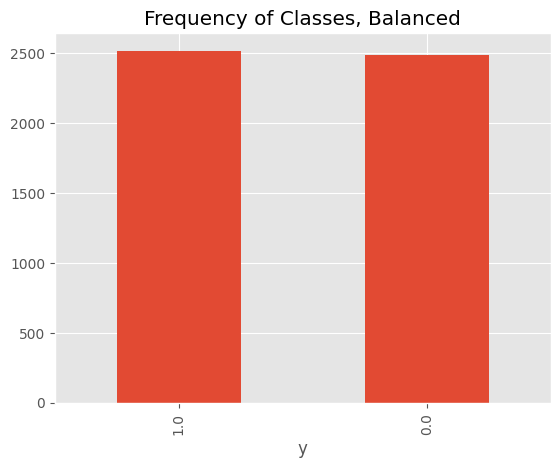

In [ ]:
plt.style.use('ggplot')
ax = df.y.value_counts().plot(kind='bar')
_ = ax.set_title('Frequency of Classes, Balanced')

In [ ]:
df0 = df[df.y == 0].copy(deep=True).reset_index(drop=True)
df1 = df[df.y == 1].sample(frac=0.01).copy(deep=True).reset_index(drop=True)

df = pd.concat([df0, df1])
df

,x0,x1,x2,x3,x4,y
0,-0.729402,0.390517,-0.603771,0.286312,-0.266412,0.0
1,0.030495,-0.970299,1.223902,-0.343972,-0.479884,0.0
2,-0.657696,-0.811643,-1.075159,0.405169,-0.022806,0.0
3,-1.283793,-0.986219,-0.172977,0.257500,-0.833360,0.0
4,-0.767363,-0.260536,-1.283720,0.480840,-0.014612,0.0
...,...,...,...,...,...,...
20,1.233866,-1.133837,1.743219,-0.684271,0.154956,1.0
21,0.677245,0.727808,-0.515675,0.032265,0.688250,1.0
22,0.390986,-0.741637,-2.439954,0.611981,1.274895,1.0
23,1.772902,0.097889,0.122242,-0.323299,1.198640,1.0


In [ ]:
df0

,x0,x1,x2,x3,x4,y
0,-0.729402,0.390517,-0.603771,0.286312,-0.266412,0.0
1,0.030495,-0.970299,1.223902,-0.343972,-0.479884,0.0
2,-0.657696,-0.811643,-1.075159,0.405169,-0.022806,0.0
3,-1.283793,-0.986219,-0.172977,0.257500,-0.833360,0.0
4,-0.767363,-0.260536,-1.283720,0.480840,-0.014612,0.0
...,...,...,...,...,...,...
2478,-1.223346,0.142211,-2.045727,0.766342,-0.023626,0.0
2479,-1.448537,-1.802566,-1.592837,0.677666,-0.367759,0.0
2480,-0.360848,-1.828738,1.075164,-0.238885,-0.694591,0.0
2481,-1.193855,-0.864901,0.894538,-0.052861,-1.207314,0.0


In [ ]:
df1

,x0,x1,x2,x3,x4,y
0,0.813948,0.208682,0.506140,-0.273073,0.365954,1.0
1,0.992547,1.476360,1.042306,-0.450737,0.272111,1.0
2,-0.205155,-0.156230,-1.680113,0.498847,0.543750,1.0
3,0.968884,-0.646926,-1.118991,0.151757,1.140805,1.0
4,1.069148,0.020311,1.505860,-0.591637,0.136171,1.0
5,1.421712,-0.653811,-0.900564,0.017330,1.370270,1.0
6,1.269990,1.017408,-0.764321,0.004364,1.207596,1.0
7,0.598548,-0.545411,-0.903336,0.152486,0.791623,1.0
8,1.032877,0.565167,1.096893,-0.472440,0.278155,1.0
9,0.989123,0.828078,0.785457,-0.379036,0.374916,1.0


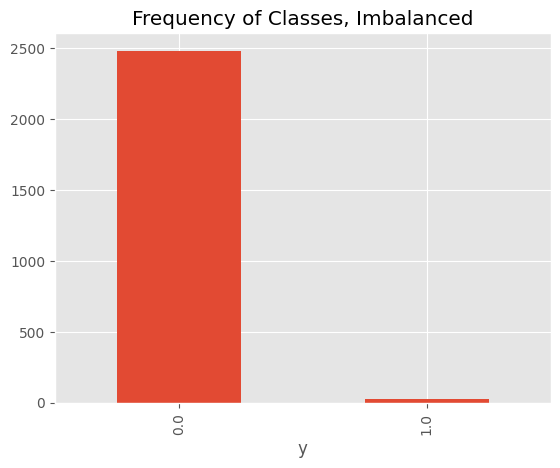

In [ ]:
ax = df.y.value_counts().plot(kind='bar')
_ = ax.set_title('Frequency of Classes, Imbalanced')